# Applying CCM Using causal-ccm package
In this section we show how we can use `causal-ccm` package to infer causality.

## Install CCM and Load Packages

In [1]:
# !pip install causal-ccm

In [21]:
from causal_ccm.causal_ccm import ccm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load Dataset

In [23]:
df = pd.read_csv('../data/La Mesa_dataset.csv')
df.head()

,Time,Rain,ONI,NIA,Dam
0,0,0.0,-0.7,38.225693,78.63
1,1,0.0,-0.7,57.996530,78.63
2,2,0.0,-0.7,49.119213,78.61
3,3,0.0,-0.7,47.034720,78.59
4,4,0.0,-0.7,42.223380,78.56


In [24]:
# get the variables we want to check causality on
X = df['Rain']
Y = df['Dam']

## Run CCM

In [25]:
# inputs
tau = 1 # time lag
E = 2 # shadow manifold embedding dimensions
L = len(X) # length of time period to consider

# if we wish to check if X causes Y
ccm1 = ccm(X, Y, tau, E, L)

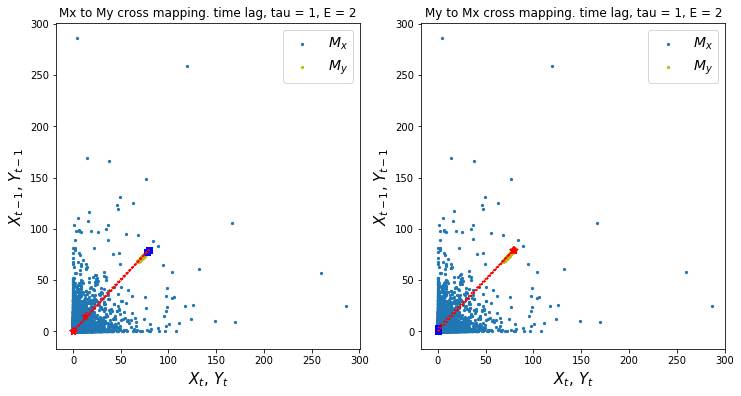

In [26]:
# visualize sample cross mapping
ccm1.visualize_cross_mapping()

In [27]:
# causality X -> Y
# returns: (correlation ("strength" of causality), p-value(significance))
corr_, p = ccm1.causality()
corr_, p

(0.3167420091903731, 1.5115109778795218e-165)

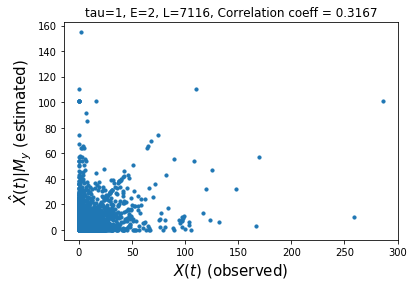

In [28]:
# visualize correlation of X->Y
# stronger correlation = stronger causal relationship
ccm1.plot_ccm_correls()

/Users/prince.javier/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


X->Y r 0.3 p value 0.0
Y->X r 0.1 p value 0.0


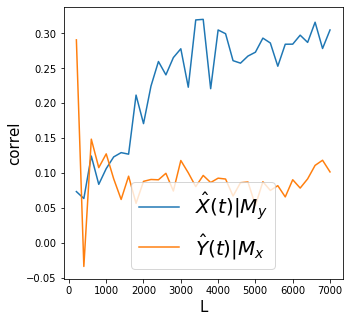

In [29]:
# checking convergence
# Looking at "convergence"
L_range = range(5, len(X), 200) # L values to test
tau = 1
E = 2

Xhat_My, Yhat_Mx = [], [] # correlation list
for L in L_range: 
    ccm_XY = ccm(X, Y, tau, E, L) # define new ccm object # Testing for X -> Y
    ccm_YX = ccm(Y, X, tau, E, L) # define new ccm object # Testing for Y -> X    
    Xhat_My.append(ccm_XY.causality()[0]) 
    Yhat_Mx.append(ccm_YX.causality()[0]) 
    
# plot convergence as L->inf. Convergence is necessary to conclude causality
plt.figure(figsize=(5,5))
plt.plot(L_range, Xhat_My, label='$\hat{X}(t)|M_y$')
plt.plot(L_range, Yhat_Mx, label='$\hat{Y}(t)|M_x$')
plt.xlabel('L', size=15)
plt.ylabel('correl', size=15)
plt.legend(prop={'size': 20})    

print('X->Y r', np.round(Xhat_My[-1], 2), 'p value', np.round(ccm_XY.causality()[1], 4))
print('Y->X r', np.round(Yhat_Mx[-1], 2), 'p value', np.round(ccm_YX.causality()[1], 4))

## Interpretation

From the charts above, we find stronger convergent cross mapping for the effect of rain $X$ on dam levels $Y$ and weaker CCM for the effect of dam levels $Y$ on rain $X$. Note that for both cases, p-values are 0.0 which means the causalities are significant. We can then say that rain drives dam levels more strongly than dam levels drive rain.